# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** M. Reihan Alif Albatino D
- **Email:** m.reihanalif.ad@gmail.com
- **ID Dicoding:** reihan_alif

## Menentukan Pertanyaan Bisnis

- Bagaimana performa transaksi sewa sepeda dalam beberapa bulan terakhir?
- Pada waktu apa yang paling banyak dan paling sedikit terjadi transaksi sewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
hour_df = pd.read_csv("data\hour.csv")
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [5]:
day_df = pd.read_csv("data\day.csv")
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


**Insight:**
- instant berisikan nomor indeks atau urutan dari setiap catatan (record)
- dteday berisikan infromasi mengenai tanggal menggunakan format harian (tahun-bulan-tanggal)
- season berisikan informasi mengenai musim (1:spring, 2:summer, 3:fall, 4:winter)
- yr berisikan informasi mengenai tahun (0:2011, 1:2012)
- mnth berisikan informasi mengenai bulan (1-12)
- hr berisikan informasi mengenai jam (0-23)
- holiday berisikan informasi mengenai hari libur sesuai dengan daftar pada http://dchr.dc.gov/page/holiday-schedule (0:weekend/workingday, 1:holiday)
- weekday berisikan informasi mengenai hari dalam seminggu (0-6 atau minggu-sabtu)
- workingday berisikan informasi mengenai hari kerja (0:weekend/holiday, 1:workingday)
- weathersit berisikan informasi mengenai cuaca (1:cerah, 2:berkabut, 3:hujan, hujan, 4:hujan badai (cuaca ekstrim))
- temp berisikan informasi mengenai suhu temperatur yang sudah dinormalisasikan dalam celsius dengan nilai max 41
- atemp berisikan informasi mengenai suhu temperatur yang dirasakan yang sudah dinormalisasikan dalam celsius dengan nilai max 50
- hum berisikan informasi mengenai kelembapan yang sudah dinormalisasikan dengan nilai max 100
- windspeed berisikan informasi mengenai kecepatan angin yang sudah dinormalisasikan dengan nilai max 67
- casual berisikan informasi mengenai jumlah pengguna kasual
- registered berisikan informasi mengenai jumlah pengguna yang sudah terdaftar
- cnt berisikan informasi mengenai jumlah total penyewaan sepeda termasuk gabungan dari kasual dan terdaftar

### Assessing Data

In [6]:
# Menampilkan tipe data yang ada pada setiap kolom dataset hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Terdapat 4 data/kolom bertipe float64
- Terdapat 12 data/kolom bertipe int64
- Terdapat 1 data/kolom bertipe object

**Problem:**
- Sebaiknya data/kolom "dteday" bertipe date-time

In [7]:
# Menampilkan apakah ada missing value pada dataset hour_df
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Tidak ditemukan missing value pada dataset hour_df

In [8]:
# Menampilkan jumlah duplikasi pada dataset hour_df
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Tidak ditemukan duplikasi data pada dataset hour_df

In [9]:
# Menampilkan informasi/deskripsi lengkap mengenai dataset hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ditemukan kejanggalan pada nilai/parameter yang ada (mean, media, min, dan max) pada dataset hour_df

In [10]:
# Menampilkan tipe data yang ada pada setiap kolom dataset day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Terdapat 4 data/kolom bertipe float64
- Terdapat 11 data/kolom bertipe int64
- Terdapat 1 data/kolom bertipe object

**Problem:**
- Sebaiknya data/kolom "dteday" bertipe date-time

In [11]:
# Menampilkan apakah ada missing value pada dataset day_df
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Tidak ditemukan missing value pada dataset day_df

In [12]:
# Menampilkan jumlah duplikasi pada dataset day_df
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Tidak ditemukan duplikasi data pada dataset day_df

In [13]:
# Menampilkan informasi/deskripsi lengkap mengenai dataset day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Tidak ditemukan kejanggalan pada nilai/parameter yang ada (mean, media, min, dan max) pada dataset day_df

|  | Tipe Data | Missing Value | Duplicate Data | Inaccurate Value |
|----------|----------|----------|----------|----------|
| hour_df | Terdapat kesalahan tipe data untuk kolom dteday. | - | - | - |
| day_df | Terdapat kesalahan tipe data untuk kolom dteday. | - | - | - |

### Cleaning Data

In [14]:
# Mengatasi masalah pada tipe data yang salah pada dataset hour_df dan day_df
datetime_column = ["dteday"]
 
for column in datetime_column:
  hour_df[column] = pd.to_datetime(hour_df[column])
  day_df[column] = pd.to_datetime(day_df[column])

In [15]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Sekarang tipe data pada kolom dteday telah sesuai dengan format data

In [16]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Sekarang tipe data pada kolom dteday telah sesuai dengan format data

## Exploratory Data Analysis (EDA)

### Melakukan Eksplorasi Data

In [17]:
# Mengekplorasi data hour_df
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight:**
> Berdasarkan rangkuman parameter statistik di atas, kita dapat memperoleh informasi jumlah pelanggan sebanyak 977 pelanggan perjam dengan yang terdaftar di kisaran 0 hingga 886 orang dengan rata-rata pelanggan terdaftar sebanyak 153 orang perjam dan sisanya merupakan pelanggan kasual. Lalu didapatkan juga informasi bahwa rata-rata pelanggan melakukan peminjaman sepeda pada musim antara musim panas dan musim gugur. 

In [18]:
hour_df.groupby(by="season").agg({
    "cnt": "max",
    "registered": ["max", "min", "mean", "std"],
    "casual": ["max", "min", "mean", "std"],
})

cnt registered                             casual                 \
        max        max min        mean         std    max min       mean   
season                                                                     
1       801        681   0   96.823668  104.347605    367   0  14.290901   
2       957        782   0  162.183488  152.751493    361   0  46.160581   
3       977        886   0  185.729093  166.430156    350   0  50.287144   
4       967        876   0  168.202032  157.559340    362   0  30.666824   

                   
              std  
season             
1       27.463006  
2       57.455803  
3       51.751916  
4       46.034058

**Insight:**
> Berdasarkan pivot table di atas, dapat diketahui bahwa pelanggan yang menyewa sepeda didominasi oleh pelanggan yang terdaftar dan paling banyak menyewa sepeda ketika musim gugur.

In [19]:
hour_df.groupby(by="weekday").instant.nunique().sort_values(ascending=False)

weekday
6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: instant, dtype: int64

In [20]:
hour_df.groupby(by="holiday").instant.nunique().sort_values(ascending=False)

holiday
0    16879
1      500
Name: instant, dtype: int64

In [21]:
hour_df.groupby(by="workingday").instant.nunique().sort_values(ascending=False)

workingday
1    11865
0     5514
Name: instant, dtype: int64

**Insight:**
> Berdasarkan hasil ketiga (weekday, holiday, dan workingday) pengelompokan di atas, dapat dilihat bahwa kegiatan penyewaan sepeda terbanyak dilakukan pada hari kerja (workingday). Hal ini dapat disimpulkan karena pada weekday dapat diketahui bahwa terdapat dua kategori yakni working day dan weekend, dimana workingday (1-5 atau senin sampai jum'at) dan weekend (0 dan 6 atau minggu dan sabtu), ketika ditotalkan maka jumlah transaksi sewa sepeda pada hari weekend adalah 2515 + 2502 = 5017 jam di mana ada transaksi, sedangkan jumlah transaksi sewa sepeda pada hari kerja (workingday) adalah 2487 + 2479 + 2475 + 2471 + 2453 - 500 = 11865 jam di mana ada transaksi, dan untuk jumlah pelanggan yang menyewa sepeda pada hari libur (holiday) adalah 500 jam di mana ada transaksi.

catatan: hari libur (holiday) dipisah dengan hari weekend pada data ini.

In [22]:
# Mengekplorasi data day_df
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight:**
> Berdasarkan rangkuman parameter statistik di atas, kita dapat memperoleh informasi jumlah pelanggan sebanyak 8714 pelanggan perhari dengan yang terdaftar di kisaran 20 hingga 6946 orang dengan rata-rata pelanggan terdaftar sebanyak 3656 orang perhari dan sisanya merupakan pelanggan kasual. Lalu didapatkan juga informasi bahwa rata-rata pelanggan melakukan peminjaman sepeda pada musim antara musim panas dan musim gugur. 

In [23]:
day_df.groupby(by="season").agg({
    "cnt": "max",
    "registered": ["max", "min", "mean", "std"],
    "casual": ["max", "min", "mean", "std"],
})

cnt registered                                casual       \
         max        max  min         mean          std    max  min   
season                                                               
1       7836       5315  416  2269.204420  1200.269751   3155    9   
2       8362       6456  674  3886.233696  1353.375628   3410  120   
3       8714       6917  889  4441.691489  1304.626949   3160  118   
4       8555       6946   20  3999.050562  1444.782557   3031    2   

                                 
               mean         std  
season                           
1        334.928177  387.655561  
2       1106.097826  737.590829  
3       1202.611702  595.975032  
4        729.112360  606.318118

**Insight:**
> Berdasarkan pivot table di atas, dapat diketahui bahwa pelanggan yang menyewa sepeda didominasi oleh pelanggan yang terdaftar dan paling banyak menyewa sepeda ketika musim gugur.

In [24]:
day_df.groupby(by="weekday").instant.nunique().sort_values(ascending=False)

weekday
0    105
1    105
6    105
2    104
3    104
4    104
5    104
Name: instant, dtype: int64

In [25]:
day_df.groupby(by="holiday").instant.nunique().sort_values(ascending=False)

holiday
0    710
1     21
Name: instant, dtype: int64

In [26]:
day_df.groupby(by="workingday").instant.nunique().sort_values(ascending=False)

workingday
1    500
0    231
Name: instant, dtype: int64

**Insight:**
> Berdasarkan hasil ketiga (weekday, holiday, dan workingday) pengelompokan di atas, dapat dilihat bahwa kegiatan penyewaan sepeda terbanyak dilakukan pada hari kerja (workingday). Hal ini dapat disimpulkan karena pada weekday dapat diketahui bahwa terdapat dua kategori yakni working day dan weekend, dimana workingday (1-5 atau senin sampai jum'at) dan weekend (0 dan 6 atau minggu dan sabtu), ketika ditotalkan maka jumlah  transaksi sepeda perjam pada hari weekend adalah 105 + 105 = 210 hari di mana ada transaksi, sedangkan jumlah transaksi sewa sepeda pada hari kerja (workingday) adalah 105 + 104 + 104 + 104 + 104 - 21 = 500 hari di mana ada transaksi, dan untuk jumlah pelanggan yang menyewa sepeda pada hari libur (holiday) adalah 21 hari di mana ada transaksi.

catatan: hari libur (holiday) dipisah dengan hari weekend pada data ini.

In [27]:
hour_df.groupby(by="hr").agg({
    "registered": "sum",
    "casual": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False) # Mengurutkan baris berdasarkan kolom "cnt" dengan nilai ascending/menaik = False

,registered,casual,cnt
hr,,,
17,282640,54220,336860
18,265276,44496,309772
8,245240,15761,261001
16,173914,53834,227748
19,191284,35505,226789
13,132206,52713,184919
12,134696,49718,184414
15,128543,54606,183149
14,120563,55089,175652


**Insight:**
> Dari hasil di atas, dapat diketahui bahwa pada jam 17:00 merupakan jam puncak terjadinya transaksi sewa sepeda yang didominasi oleh pelanggan yang terdaftar.

In [28]:
day_df.groupby(by="weekday").agg({
    "registered": "sum",
    "casual": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False) # Mengurutkan baris berdasarkan kolom "cnt" dengan nilai ascending/menaik = False

,registered,casual,cnt
weekday,,,
5,409552,78238,487790
4,423935,61460,485395
6,323955,153852,477807
3,415729,57319,473048
2,411266,57843,469109
1,384719,70784,455503
0,303506,140521,444027


**Insight:**
> Dari hasil di atas, dapat diketahui bahwa pada hari Jum'at merupakan hari terjadinya transaksi sewa sepeda terbanyak yang didominasi oleh pelanggan yang terdaftar.

In [29]:
hour_df["time_of_day"] = hour_df.hr.apply(lambda x: "Morning" if x <= 12 else ("Evening" if x > 17 else "Afternoon"))
hour_df.groupby(by="time_of_day").agg({
    "registered": "sum",
    "casual": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False) # Mengurutkan baris berdasarkan kolom "cnt" dengan nilai ascending/menaik = False

,registered,casual,cnt
time_of_day,,,
Morning,1002901,195341,1198242
Afternoon,837866,270462,1108328
Evening,831895,154214,986109


**Insight:**
> Dari hasil di atas, dapat diketahui bahwa pada waktu pagi hari merupakan waktu terjadinya transaksi sewa sepeda terbanyak yang didominasi oleh pelanggan yang terdaftar.

In [30]:
hour_df.groupby(by=["time_of_day", "hr"]).agg({
    "weathersit": ("max","min","mean"),
    "temp": ("max","min","mean"),
    "atemp": ("max","min","mean"),
    "cnt": ("max","min","mean")
}).sort_values(by="hr", ascending=True) # Mengurutkan baris berdasarkan kolom "hr" dengan nilai ascending/menaik = True

weathersit                temp                   atemp          \
                      max min      mean   max   min      mean     max     min   
time_of_day hr                                                                  
Morning     0           3   1  1.398072  0.82  0.04  0.467410  0.8333  0.0303   
            1           4   1  1.400552  0.82  0.04  0.459365  0.7879  0.0000   
            2           3   1  1.409790  0.82  0.02  0.454573  0.8030  0.0152   
            3           3   1  1.424677  0.80  0.02  0.453113  0.7879  0.0152   
            4           3   1  1.426112  0.78  0.02  0.446628  0.7576  0.0152   
            5           3   1  1.422594  0.78  0.02  0.436123  0.7576  0.0455   
            6           3   1  1.451034  0.80  0.02  0.432469  0.7879  0.0303   
            7           3   1  1.486933  0.80  0.02  0.439092  0.8030  0.0152   
            8           3   1  1.474553  0.84  0.02  0.454993  0.8485  0.0000   
            9           3   1  1.484182  0.86  0.04  0.476726  0.8939  0.0303   
            10          3   1  1.462173  0.92  0.04  0.500578  0.9242  0.0606   
            11          3   1  1.449794  0.94  0.06  0.522613  0.8939  0.0758   
            12          3   1  1.467033  0.96  0.06  0.540275  0.9545  0.0758   
Afternoon   13          3   1  1.444444  0.96  0.08  0.554733  0.9848  0.1061   
            14          3   1  1.433471  0.96  0.10  0.565075  1.0000  0.1212   
            15          3   1  1.425240  0.96  0.12  0.568615  0.9848  0.1212   
            16          4   1  1.398630  1.00  0.12  0.564959  0.9242  0.0909   
            17          3   1  1.409589  0.98  0.12  0.554575  0.9242  0.1061   
Evening     18          4   1  1.410714  0.96  0.08  0.541181  0.8939  0.0909   
            19          3   1  1.381868  0.92  0.08  0.524176  0.9242  0.0909   
            20          3   1  1.379121  0.92  0.06  0.508599  0.8939  0.0758   
            21          3   1  1.373626  0.88  0.06  0.495302  0.8939  0.0758   
            22          3   1  1.376374  0.84  0.06  0.484505  0.8636  0.0303   
            23          3   1  1.416209  0.84  0.04  0.475027  0.8333  0.0455   

                          cnt                  
                    mean  max min        mean  
time_of_day hr                                 
Morning     0   0.451105  283   2   53.898072  
            1   0.443289  168   1   33.375691  
            2   0.439184  132   1   22.869930  
            3   0.438396   79   1   11.727403  
            4   0.432549   28   1    6.352941  
            5   0.423145   66   1   19.889819  
            6   0.419376  213   1   76.044138  
            7   0.425557  596   1  212.064649  
            8   0.440272  839   5  359.011004  
            9   0.458715  426  14  219.309491  
            10  0.478139  539   8  173.668501  
            11  0.497477  663  10  208.143054  
            12  0.512903  776   3  253.315934  
Afternoon   13  0.525499  760  11  253.661180  
            14  0.534188  750  12  240.949246  
            15  0.536598  750   7  251.233196  
            16  0.532460  783  11  311.983562  
            17  0.523224  976  15  461.452055  
Evening     18  0.512736  977  23  425.510989  
            19  0.499459  743  11  311.523352  
            20  0.487221  567  11  226.030220  
            21  0.476503  584   6  172.314560  
            22  0.466535  502   9  131.335165  
            23  0.458086  256   2   87.831044

**Insight:**
> Dari hasil di atas, dapat diketahui bahwa rata-rata transaksi sewa sepeda biasanya terjadi pada saat cuaca cerah.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

> Bagaimana performa transaksi sewa sepeda dalam beberapa bulan terakhir?

In [31]:
hour_df['month'] = hour_df['dteday'].dt.to_period('M') # Ekstrak bulan dan tahun dari kolom 'dteday'
monthly_rentals = hour_df.groupby('month')['cnt'].sum().reset_index() # Hitung total transaksi per bulan

Mengekstrak bulan dan tahun dari data 'dteday' lalu menghitung total transaksi per bulan.

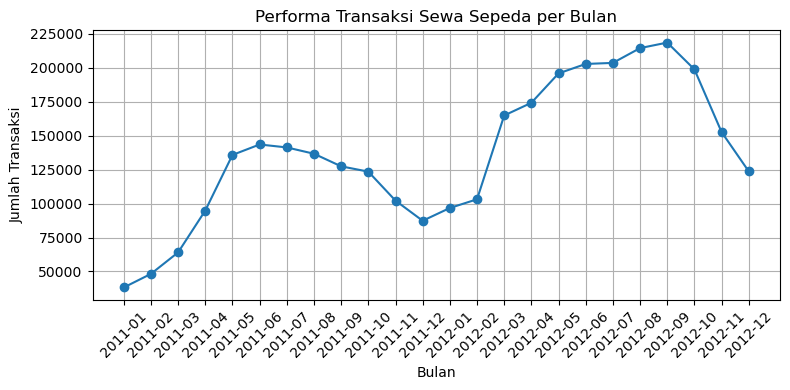

In [32]:
# Menampilkan Plot
plt.figure(figsize=(8, 4))
plt.plot(monthly_rentals['month'].astype(str), monthly_rentals['cnt'], marker='o')
plt.title('Performa Transaksi Sewa Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

**Insight:**

Dari hasil di atas, dapat diketahui bahwa penurunan performa transaksi sewa sepeda terendah terjadi pada;
- Bulan Desember 2011 
- Bulan Desember 2012

### Pertanyaan 2:

> Pada waktu apa yang paling banyak dan paling sedikit terjadi transaksi sewa sepeda?

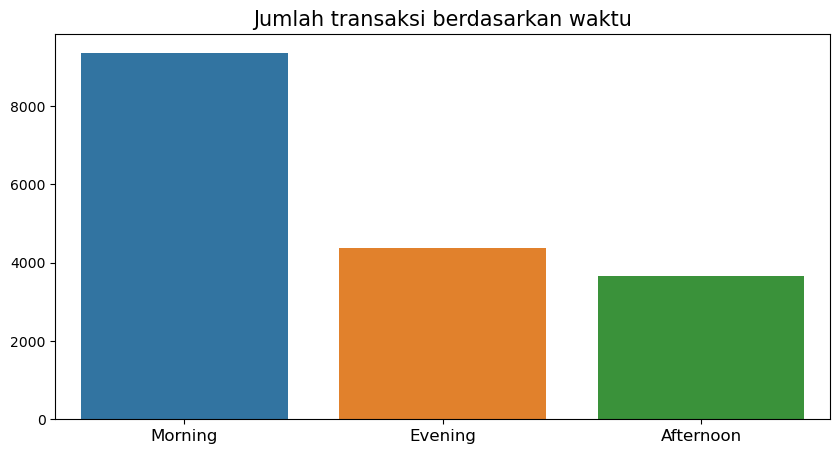

In [33]:
byday_of_time_df = hour_df.groupby(by="time_of_day").instant.nunique().reset_index()
byday_of_time_df.rename(columns={
    "instant": "cnt"
}, inplace=True)
 
plt.figure(figsize=(10, 5))
 
sns.barplot(
    y="cnt", 
    x="time_of_day",
    data=byday_of_time_df.sort_values(by="cnt", ascending=False),
)
plt.title("Jumlah transaksi berdasarkan waktu", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

**Insight:**

Dari hasil di atas, dapat diketahui bahwa waktu yang paling banyak dan sedikit terjadinya transaksi sewa sepeda adalah pada waktu; 
- Waktu pagi merupakan waktu transaksi sewa sepeda paling banyak
- Waktu siang merupakan waktu transaksi sewa sepeda paling sedikit

## Analisis Lanjutan (Opsional)

### Clustering Menggunakan Metode Binning

Menentukan batasan bin beserta label-nya pada kolom "temp" lalu memasukkan kategori tersebut ke dalam kolom baru yang diberi nama "temp_category"

In [34]:
bins = [0, 0.2, 0.4, 0.7, 0.9, 1.0] # Menentukan batasan bin
labels = ['Dingin', 'Sejuk', 'Hangat', 'Panas', 'Sangat Panas'] # Menentukan label

hour_df['temp_category'] = pd.cut(hour_df['temp'], bins=bins, labels=labels, include_lowest=True) # Lakukan binning pada kolom 'temp'

print(hour_df[['temp', 'temp_category']]) # Menampilkan hasil

       temp temp_category
0      0.24         Sejuk
1      0.22         Sejuk
2      0.22         Sejuk
3      0.24         Sejuk
4      0.24         Sejuk
...     ...           ...
17374  0.26         Sejuk
17375  0.26         Sejuk
17376  0.26         Sejuk
17377  0.26         Sejuk
17378  0.26         Sejuk

[17379 rows x 2 columns]


Menghitung jumlah dalam setiap kategori

In [35]:
jumlah_temp_kategori = hour_df.groupby('temp_category')['cnt'].sum().reset_index() # Menghitung jumlah sewa sepeda berdasarkan kategori suhu

print(jumlah_temp_kategori)

  temp_category      cnt
0        Dingin    69624
1         Sejuk   659269
2        Hangat  1705933
3         Panas   833257
4  Sangat Panas    24596


Menampilkan visualisasi hasil clustering menggunakan metode binning

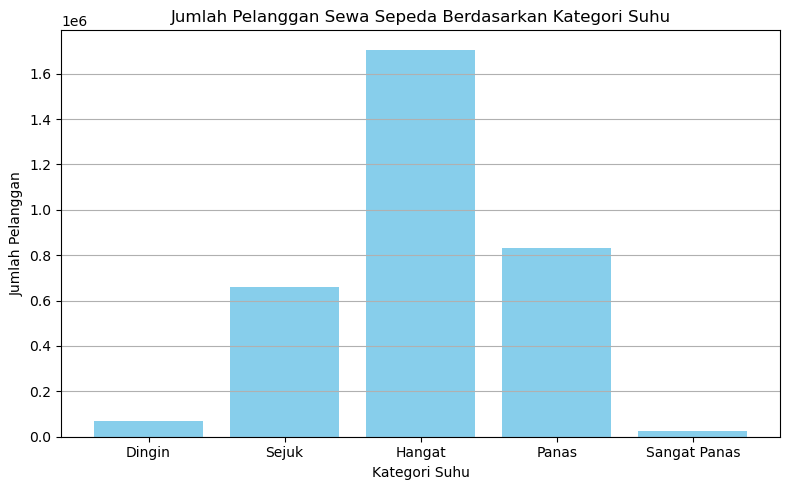

In [37]:
# Visualisasi jumlah pelanggan sewa sepeda berdasarkan kategori suhu
plt.figure(figsize=(8, 5))
plt.bar(jumlah_temp_kategori['temp_category'], jumlah_temp_kategori['cnt'], color='skyblue')
plt.title('Jumlah Pelanggan Sewa Sepeda Berdasarkan Kategori Suhu')
plt.xlabel('Kategori Suhu')
plt.ylabel('Jumlah Pelanggan')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Conclusion

- Kesimpulan pada pertanyaan 1 ialah pada performa transaksi sewa sepeda ada banyak kejadian yang terjadi, seperti terjadinya peningkatkan performa transaksi sewa sepeda di bulan Juni 2011 dan September 2012, lalu terjadinya penurunan performa transaksi sewa sepeda di bulan Desember 2011 dan Desember 2012. Hal-hal tersebut dapat terjadi dikarenakan banyak-nya faktor yang mendukung seperti; cuaca, suhu, hari kerja, hari libur, waktu, dan musim.
- Kesimpulan pada pertanyaan 2 ialah pada jumlah transaksi sepeda berdasarkan waktu dapat disimpulkan bahwa kebanyakan pelanggan melakukan transaksi sewa sepeda di waktu pagi dikarenakan kemungkinan terbesarnya ialah sepeda digunakan sebagai sarana transportasi ke tempat kerja, mengingat bahwasanya transaksi sewa sepeda lebih banyak terjadi di hari kerja dibandingkan hari libur, dan untuk transaksi sewa sepeda paling sedikit terjadi di waktu siang, mengingat jam sepeti itu bukanlah jam pulang kerja.

In [38]:
hour_df.to_csv("main_data.csv", index=False)